## Optimizing Customer Engagement through RFM Segmentation and Analysis

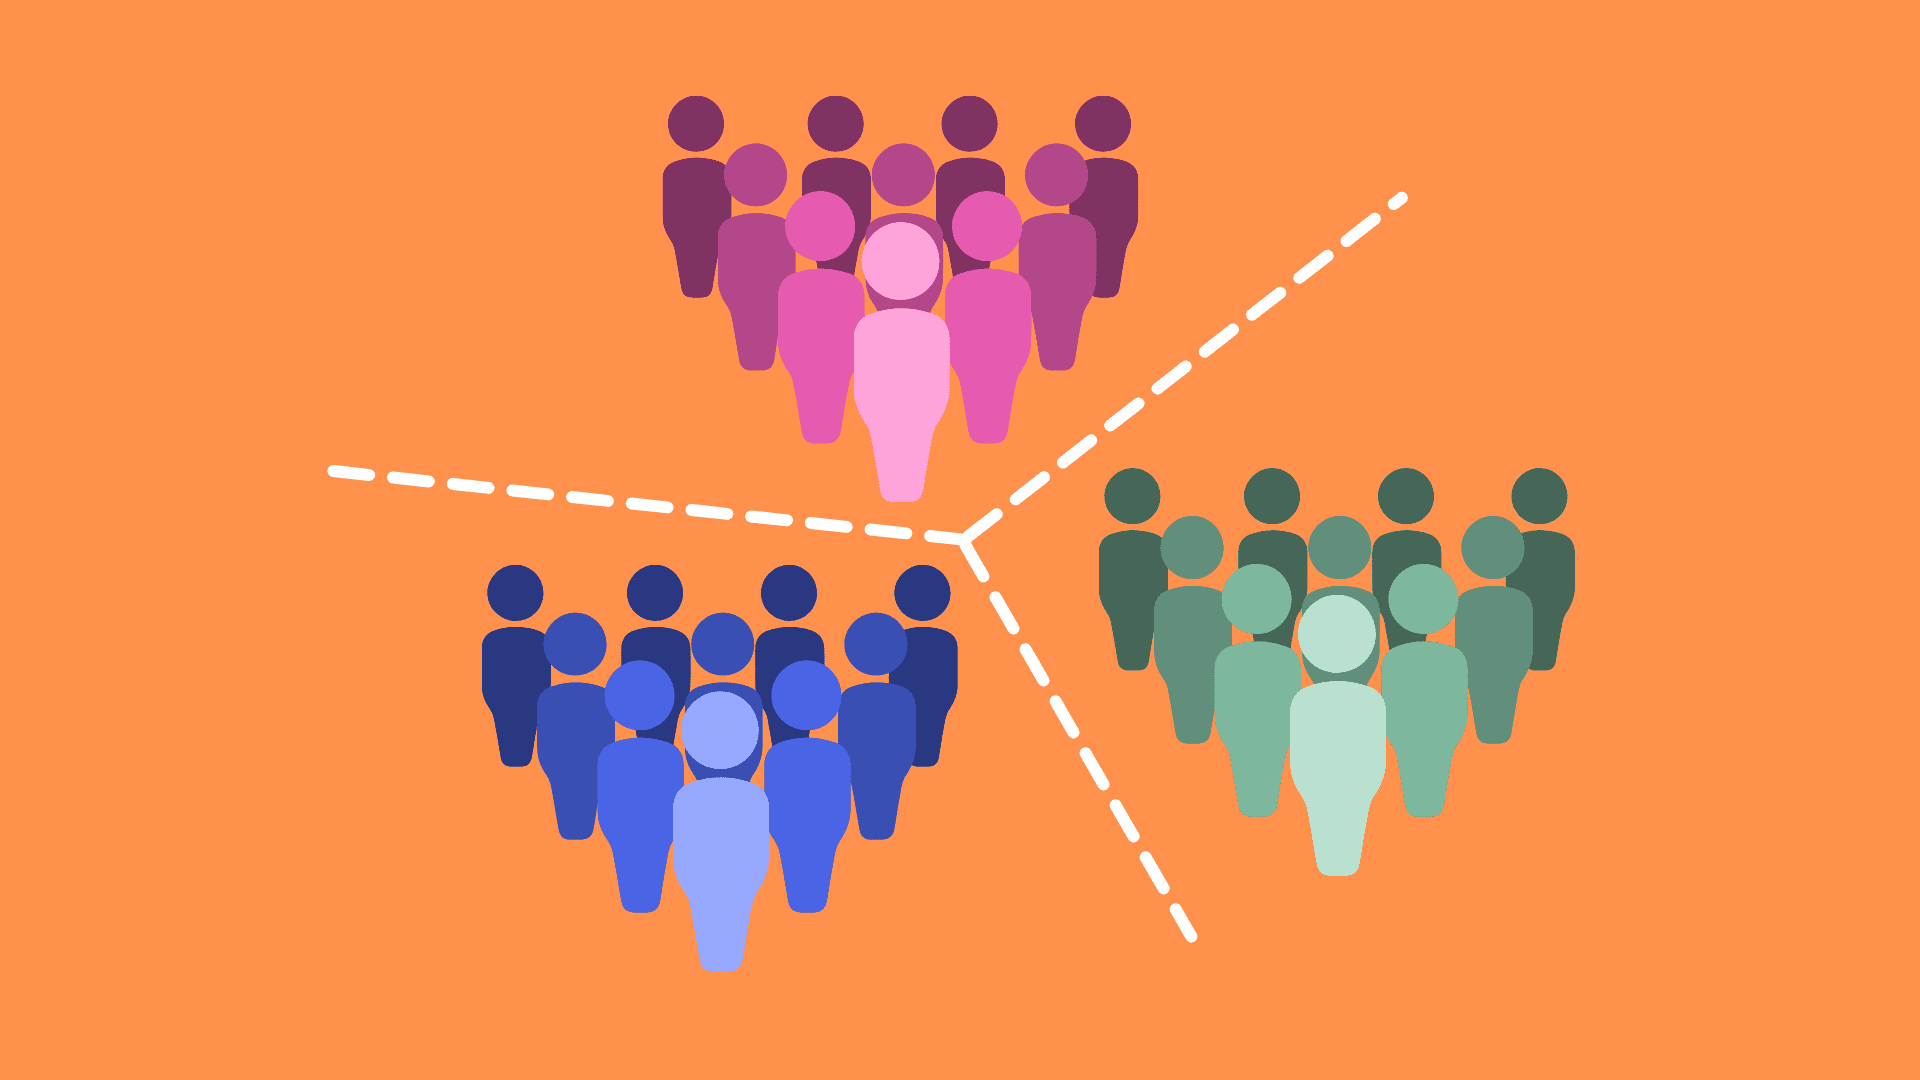

#### Project Goal:
The goal of this project is to optimize marketing strategies and improve customer engagement for a retail company by conducting hypothesis tests and customer segmentation to uncover insights into customer behavior and preferences.

__Objectives:__

For this project we will set the following objectives
1. __Exploratory Data Analysis (EDA)__ 

    * Conduct a thorough exploration of the cleaned dataset to gain insights into customer demographics and behaviors.
    * Visualize distributions of key variables such as Age, Income, Frequency, and Monetary value using histograms, boxplots.
    * Explore correlations between variables to identify potential relationships and patterns in the data.
    * Segmenting the data by different demographic or behavioral factors to uncover hidden insights.
    
2. __Hypothesis Testing: Identify Key Factors Influencing Customer Behavior:__
    * Conduct hypothesis tests to explore the impact of various factors such as education level, marital status, and income on customer spending behavior.
    * Determine which factors have a significant influence on customer spending patterns and identify potential areas for targeted marketing efforts.

3. __Segment Customers Based on Behavioral Patterns:__
    * Use the findings from hypothesis tests to segment customers into distinct groups based on their spending behavior and preferences.
    * Explore different segmentation methods such as RFM (Recency, Frequency, Monetary) analysis to categorize customers into high-value, medium-value, and low-value segments.

4. __Provide Actionable Insights and Recommendations:__

    * Summarize the findings from hypothesis tests and segmentation analysis into actionable insights and recommendations for the retail company.
    * Provide strategic recommendations for future marketing campaigns, product development, and customer engagement initiatives based on the analysis results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Set theme to darkgrid
sns.set_style("darkgrid")

In [2]:
df_cleaned = pd.read_csv('cleaned_ecommerce_data.csv')
df_cleaned.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Frequency,Monetary,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,5524,67,Graduation,Single,58138.0,0,0,2012-04-09,58,0,25,1617,7,0,0,0,0,0,1
1,2174,70,Graduation,Single,46344.0,1,1,2014-08-03,38,0,6,27,5,0,0,0,0,0,0
2,4141,59,Graduation,Together,71613.0,0,0,2013-08-21,26,0,21,776,4,0,0,0,0,0,0
3,6182,40,Graduation,Together,26646.0,1,0,2014-10-02,26,0,8,53,6,0,0,0,0,0,0
4,5324,43,PhD,Married,58293.0,1,0,2014-01-19,94,0,19,422,5,0,0,0,0,0,0


In [3]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Age                2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Marital_Status     2240 non-null   object 
 4   Income             2240 non-null   float64
 5   Kidhome            2240 non-null   int64  
 6   Teenhome           2240 non-null   int64  
 7   Dt_Customer        2240 non-null   object 
 8   Recency            2240 non-null   int64  
 9   Complain           2240 non-null   int64  
 10  Frequency          2240 non-null   int64  
 11  Monetary           2240 non-null   int64  
 12  NumWebVisitsMonth  2240 non-null   int64  
 13  AcceptedCmp1       2240 non-null   int64  
 14  AcceptedCmp2       2240 non-null   int64  
 15  AcceptedCmp3       2240 non-null   int64  
 16  AcceptedCmp4       2240 

#### Exploratory Data Analysis (EDA)

##### Distribution of Purchase Amounts

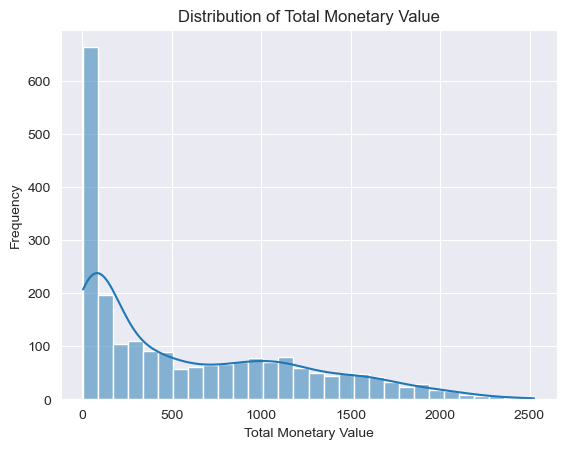

In [4]:
# Plot distribution of Monetary value

sns.histplot(df_cleaned['Monetary'], bins=30, kde=True)
plt.title('Distribution of Total Monetary Value')
plt.xlabel('Total Monetary Value')
plt.ylabel('Frequency')
plt.show()


The distribution plot of the total monetary value above shows that the majority of customers have lower total spending, with a few customers spending significantly more. This kind of distribution is common in customer data, indicating a small number of high-value customers and a larger number of low to medium-value customers.

#### Purchase Amounts by Demographics

##### 1. Age Distribution and Purchase Amounts

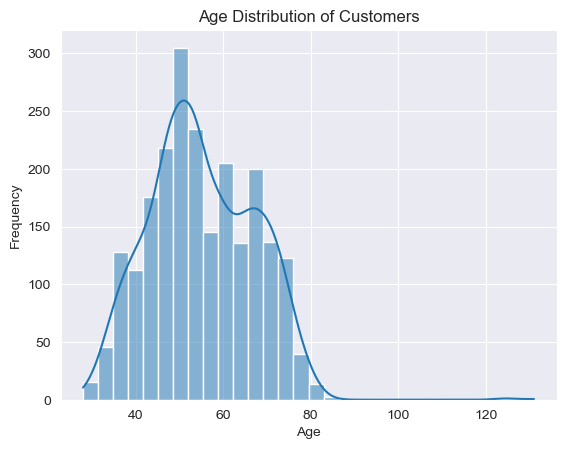

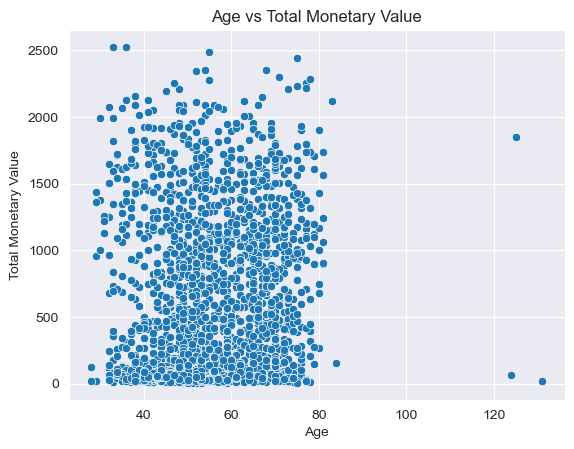

In [5]:
# Plot age distribution
sns.histplot(df_cleaned['Age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of Age vs Monetary Value
sns.scatterplot(x='Age', y='Monetary', data=df_cleaned)
plt.title('Age vs Total Monetary Value')
plt.xlabel('Age')
plt.ylabel('Total Monetary Value')
plt.show()

__Age Distribution:__

* The age distribution shows that most customers are between 30 and 70 years old, with a peak around the age of 50.
* There are some outliers, with ages recorded above 100, which might need further investigation or cleaning.

__Age vs. Total Monetary Value:__

* The scatter plot indicates that customers of all ages have a wide range of total monetary values.
* There doesn't seem to be a strong correlation between age and total spending, as high and low spenders are distributed across different age groups.
* There are some unusual data points where ages are recorded above 100, which suggests potential data entry errors.

##### Cleaning the Data for Age Outliers

In [6]:
# Removing implausible age values (ages above 100)
df_cleaned = df_cleaned[df_cleaned['Age'] <= 100]

# Verify the cleaning
print(df_cleaned['Age'].describe())


count    2237.000000
mean       55.098346
std        11.701917
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max        84.000000
Name: Age, dtype: float64


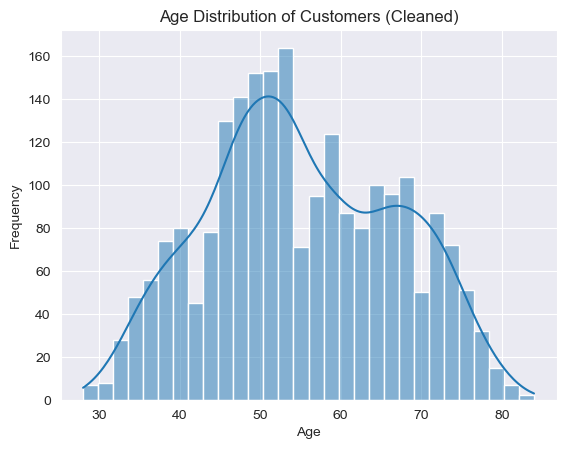

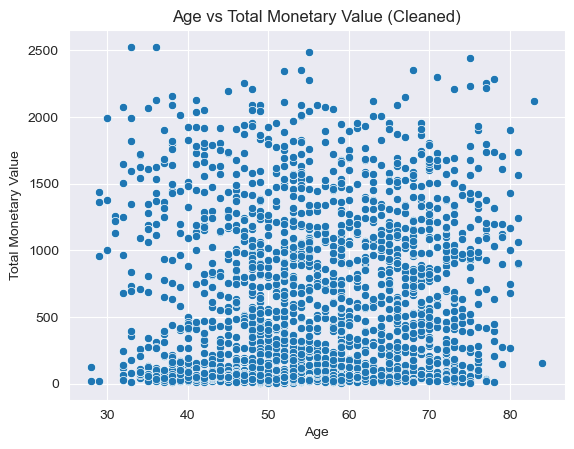

In [7]:
# Re-plot age distribution
sns.histplot(df_cleaned['Age'], bins=30, kde=True)
plt.title('Age Distribution of Customers (Cleaned)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Re-plot Age vs. Monetary Value
sns.scatterplot(x='Age', y='Monetary', data=df_cleaned)
plt.title('Age vs Total Monetary Value (Cleaned)')
plt.xlabel('Age')
plt.ylabel('Total Monetary Value')
plt.show()


The cleaned age distribution now shows a more realistic range, focusing on customers aged 30 to 80. This should improve the accuracy of our analysis

The scatter plot of age vs. total monetary value, after cleaning the data, shows a more realistic range of ages (30-80 years). Now let's proceed with the box plots for education level and marital status against total monetary value

##### 2. Education Level and Purchase Amounts 

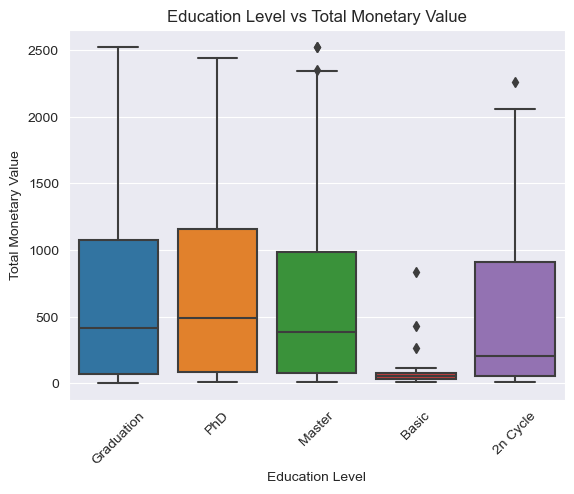

In [8]:
# Boxplot of Education level vs Monetary Value
sns.boxplot(x='Education', y='Monetary', data=df_cleaned)
plt.title('Education Level vs Total Monetary Value')
plt.xlabel('Education Level')
plt.ylabel('Total Monetary Value')
plt.xticks(rotation=45)
plt.show()


The box plot of education level vs. total monetary value indicates that customers with a "Basic" education tend to spend significantly less compared to those with higher education levels such as "Graduation," "PhD," "Master," and "2n Cycle." The median spending is higher for customers with advanced education levels.

##### 3. Marital Status and Purchase Amounts

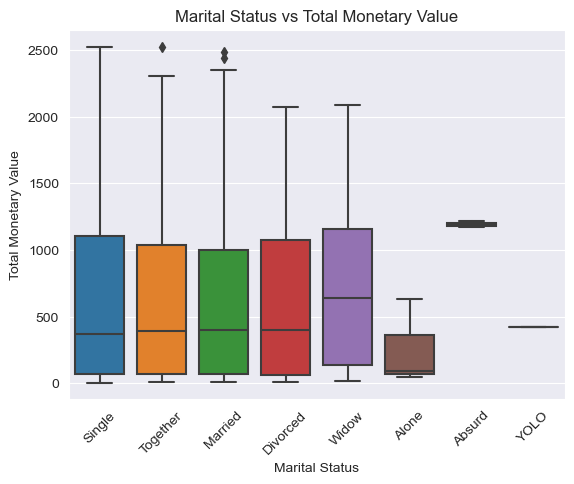

In [9]:
# Boxplot of Marital Status vs Monetary Value

sns.boxplot(x='Marital_Status', y='Monetary', data=df_cleaned)
plt.title('Marital Status vs Total Monetary Value')
plt.xlabel('Marital Status')
plt.ylabel('Total Monetary Value')
plt.xticks(rotation=45)
plt.show()


                Age    Income  Frequency  Monetary   Recency
Age        1.000000  0.203825   0.179703  0.113865  0.019670
Income     0.203825  1.000000   0.679072  0.803746  0.006392
Frequency  0.179703  0.679072   1.000000  0.754390  0.006073
Monetary   0.113865  0.803746   0.754390  1.000000  0.021199
Recency    0.019670  0.006392   0.006073  0.021199  1.000000


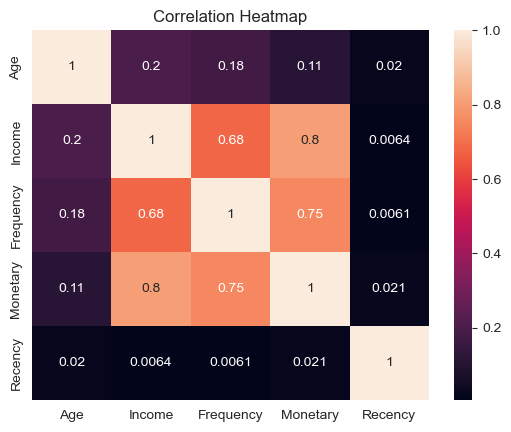

In [23]:
# Calculate correlation coefficients between numerical features
correlation_matrix = df_cleaned[['Age', 'Income', 'Frequency', 'Monetary', 'Recency']].corr()

# Display the correlation matrix (optional)
print(correlation_matrix)

# Heatmap visualization 
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()


* __Income and Monetary:__ There is a strong positive correlation (0.8), indicating that higher income is associated with higher total spending.
* __Frequency and Monetary:__ Also strongly correlated (0.75), suggesting that more frequent purchases lead to higher total spending.
* __Income and Frequency:__ Moderately correlated (0.68), meaning that higher-income individuals tend to make more frequent purchases.
* __Age:__ Shows weak correlation with other variables, indicating age is not a strong predictor of income, purchase frequency, or total spending in this dataset.

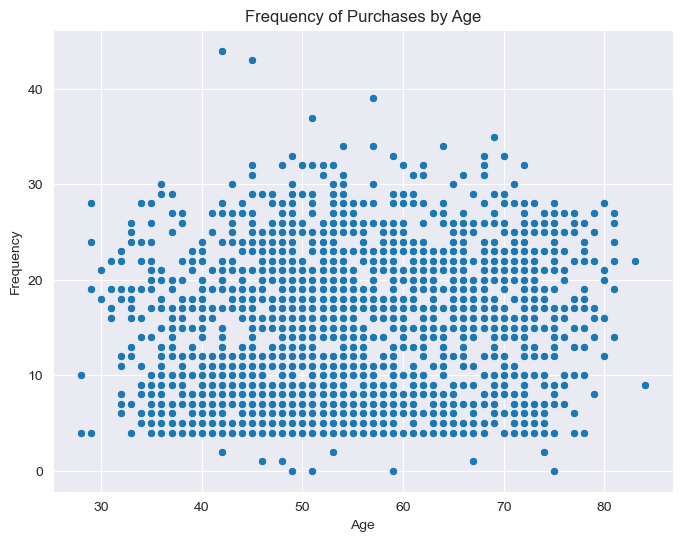

In [11]:
# Explore the relationship between Age and Frequency
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Frequency', data=df_cleaned)
plt.title('Frequency of Purchases by Age')
plt.show()



The distribution of purchase frequency is fairly consistent across different age groups, with no clear trend showing that a particular age group makes significantly more purchases.
There is a wide range of frequencies within each age group, indicating variability in purchasing behavior irrespective of age.

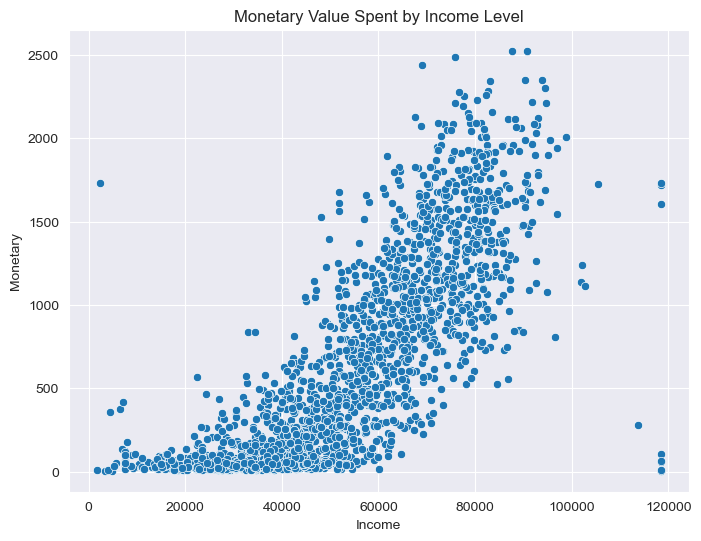

In [12]:
# Explore the relationship between Income and Monetary Value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Monetary', data=df_cleaned)
plt.title('Monetary Value Spent by Income Level')
plt.show()


The findings above shows a positive correlation between income level and monetary value spent. This means that as income level increases, the amount of money people spend also increases.

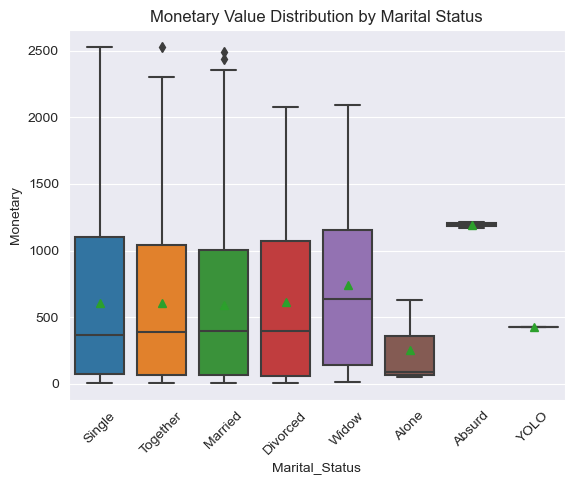

In [13]:
# Explore the distribution of Monetary Value across different Marital Status categories
sns.boxplot(x='Marital_Status', y='Monetary', showmeans=True, data=df_cleaned)
plt.title('Monetary Value Distribution by Marital Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


### Hypothesis Testing

#### 1. Formulate Hypotheses
Based on the findings from our EDA, we will formulate some hypotheses to test:

* __Hypothesis 1 (H01):__ Customers with higher education levels tend to spend more.
* __Hypothesis 2 (H02):__ There is a significant difference in spending based on marital status.
* __Hypothesis 3 (H03):__ Higher income leads to higher total monetary value spent.



#### 2. Perform Hypothesis Testing

__1. Hypothesis Test: Impact of Education Level on Total Monetary Value__

We will use ANOVA (Analysis of Variance) to test if there are significant differences in the total monetary value spent across different education levels.

In [14]:
import scipy.stats as stats

# Perform ANOVA test
alpha = 0.05
anova_result = stats.f_oneway(
    df_cleaned[df_cleaned['Education'] == 'Basic']['Monetary'],
    df_cleaned[df_cleaned['Education'] == '2n Cycle']['Monetary'],
    df_cleaned[df_cleaned['Education'] == 'Graduation']['Monetary'],
    df_cleaned[df_cleaned['Education'] == 'Master']['Monetary'],
    df_cleaned[df_cleaned['Education'] == 'PhD']['Monetary']
)

print("ANOVA result for Education Level impact on Total Monetary Value:")
print(anova_result)
p_value = anova_result[1]

print('')
# Conclusion (based on p-value and chosen alpha)
if p_value <= alpha:
    print("Reject H0: There is a significant difference in total monetary value spent across different education levels.")
else:
    print("Fail to reject H0: There is no significant difference in total monetary value spent across different education levels.")


ANOVA result for Education Level impact on Total Monetary Value:
F_onewayResult(statistic=13.59867266729862, pvalue=5.889795808232043e-11)

Reject H0: There is a significant difference in total monetary value spent across different education levels.


__Interpretation__
* __The p-value (55.889795808232043e-11)__ is significantly less than the alpha level of 0.05.
* Therefore, we reject the null __hypothesis (H0)__, indicating that there is a significant difference in the total monetary value spent among customers with different education levels.




##### Next Steps
To further explore which specific education levels differ from each other, we will conduct a post-hoc analysis using Tukey's HSD test.

In [15]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df_cleaned['Monetary'],
                          groups=df_cleaned['Education'],
                          alpha=0.05)
print(tukey)


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1     group2    meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------
  2n Cycle      Basic -419.2385    0.0 -668.2851 -170.1919   True
  2n Cycle Graduation   118.864 0.0692   -5.5429  243.2709  False
  2n Cycle     Master  110.7463 0.2103  -31.6257  253.1183  False
  2n Cycle        PhD  168.9404 0.0065   32.6396  305.2413   True
     Basic Graduation  538.1026    0.0  311.7572  764.4479   True
     Basic     Master  529.9848    0.0   293.289  766.6806   True
     Basic        PhD   588.179    0.0  355.0845  821.2735   True
Graduation     Master   -8.1178 0.9994 -105.4717   89.2362  False
Graduation        PhD   50.0764 0.5304  -38.1615  138.3143  False
    Master        PhD   58.1942  0.617  -53.9603  170.3487  False
-----------------------------------------------------------------


The Tukey's HSD test results shown above provide detailed comparisons between the different education levels regarding their impact on total monetary value spent. Here's a summary of the findings:

__Multiple Comparison of Means - Tukey HSD__
__Interpretation__
* Reject indicates significant differences.
* False indicates no significant differences.

The Tukey's HSD test results indicate that:

* Customers with a "Basic" education spend significantly less than those with "2n Cycle," "Graduation," "Master," and "PhD" levels.
* "2n Cycle" and "PhD" education levels also show significant differences, with PhD holders spending more.
* No significant spending differences are observed between other pairs of education levels (e.g., "Graduation" vs. "Master," "Graduation" vs. "PhD," etc.).

__2. Impact of Marital Status on Total Monetary Value:__

In [16]:
# Perform ANOVA test
anova_result_marital = stats.f_oneway(
    df_cleaned[df_cleaned['Marital_Status'] == 'Single']['Monetary'],
    df_cleaned[df_cleaned['Marital_Status'] == 'Together']['Monetary'],
    df_cleaned[df_cleaned['Marital_Status'] == 'Married']['Monetary'],
    df_cleaned[df_cleaned['Marital_Status'] == 'Divorced']['Monetary'],
    df_cleaned[df_cleaned['Marital_Status'] == 'Widow']['Monetary'],
    df_cleaned[df_cleaned['Marital_Status'] == 'Alone']['Monetary'],
    df_cleaned[df_cleaned['Marital_Status'] == 'Absurd']['Monetary'],
    df_cleaned[df_cleaned['Marital_Status'] == 'YOLO']['Monetary']
)

print("ANOVA result for Marital Status impact on Total Monetary Value:")
print(anova_result_marital)

print('')
p_value_marital = anova_result_marital[1]

if p_value_marital <= alpha:
    print("Reject H0: There is a significant difference in total monetary value spent across different marital statuses.")
else:
    print("Fail to reject H0: There is no significant difference in total monetary value spent across different marital statuses.")



ANOVA result for Marital Status impact on Total Monetary Value:
F_onewayResult(statistic=1.061451774521418, pvalue=0.38589916683378545)

Fail to reject H0: There is no significant difference in total monetary value spent across different marital statuses.


The ANOVA test results for the impact of marital status on total monetary value spent indicate that there is no significant difference in spending across different marital statuses. Here are the detailed findings:

ANOVA Result for Marital Status Impact on Total Monetary Value
* __Statistic:__ 1.061451774521418
* __P-value:__ 0.38589916683378545

__Fail to reject H0:__ The p-value (0.3859) is greater than the alpha level (0.05), indicating that there is no statistically significant difference in total monetary value spent across different marital statuses.



__3. Correlation between Income and Total Monetary Value__

In [17]:
# Calculate Pearson correlation
correlation_income_monetary, p_value_income_monetary = stats.pearsonr(df_cleaned['Income'], df_cleaned['Monetary'])

print("Pearson correlation between Income and Total Monetary Value:")
print(f"Correlation: {correlation_income_monetary}, P-value: {p_value_income_monetary}")
print('')
if p_value_income_monetary <= alpha:
    print("Reject H0: There is a significant correlation between income and total monetary value.")
else:
    print("Fail to reject H0: There is no significant correlation between income and total monetary value.")


Pearson correlation between Income and Total Monetary Value:
Correlation: 0.8037457806030315, P-value: 0.0

Reject H0: There is a significant correlation between income and total monetary value.


__Correlation Results:__
* __Correlation Coefficient:__ 0.8037457806030315
* __P-value:__ 0.0

__0.8037__ indicates a strong positive correlation between income and total monetary value. This means that as income increases, the total monetary value spent also tends to increase significantly. As also shown by the heatmap above

### Customer Segmentations

__1. Education Level Segmentation__

In [18]:
# Segment customers based on education level
education_segments = {
    'Basic': df_cleaned[df_cleaned['Education'] == 'Basic'],
    '2n Cycle': df_cleaned[df_cleaned['Education'] == '2n Cycle'],
    'Graduation': df_cleaned[df_cleaned['Education'] == 'Graduation'],
    'Master': df_cleaned[df_cleaned['Education'] == 'Master'],
    'PhD': df_cleaned[df_cleaned['Education'] == 'PhD']
}


In [19]:
# Analyze characteristics of each education level segment
education_segments_info = {}
for segment, data in education_segments.items():
    segment_info = {
        'Average_Age': data['Age'].mean(),
        'Average_Income': data['Income'].mean(),
        'Average_Recency': data['Recency'].mean(),
        'Average_Monetary': data['Monetary'].mean(),
        'Average_Frequency': data['Frequency'].mean()
        # Add more attributes as needed
    }
    education_segments_info[segment] = segment_info


# Profile each segment
for segment, info in education_segments_info.items():
    print(f"Segment: {segment}")
    print("Segment Profile:")
    print(info)
    print("\n")

# Identify the most valuable segments
most_valuable_segments = sorted(education_segments_info.items(), key=lambda x: x[1]['Average_Monetary'], reverse=True)
print("Most Valuable Segments:")
for segment, info in most_valuable_segments:
    print(f"{segment}: Average Monetary Value - {info['Average_Monetary']}")


Segment: Basic
Segment Profile:
{'Average_Age': 46.53703703703704, 'Average_Income': 20306.25925925926, 'Average_Recency': 48.44444444444444, 'Average_Monetary': 81.79629629629629, 'Average_Frequency': 7.018518518518518}


Segment: 2n Cycle
Segment Profile:
{'Average_Age': 51.223880597014926, 'Average_Income': 47688.75363031413, 'Average_Recency': 48.29353233830846, 'Average_Monetary': 501.0348258706468, 'Average_Frequency': 13.890547263681592}


Segment: Graduation
Segment Profile:
{'Average_Age': 54.36468500443656, 'Average_Income': 52159.602418404174, 'Average_Recency': 50.035492457852705, 'Average_Monetary': 619.8988464951198, 'Average_Frequency': 14.990239574090506}


Segment: Master
Segment Profile:
{'Average_Age': 57.12162162162162, 'Average_Income': 52796.999908527665, 'Average_Recency': 47.586486486486486, 'Average_Monetary': 611.7810810810811, 'Average_Frequency': 14.927027027027027}


Segment: PhD
Segment Profile:
{'Average_Age': 57.81855670103093, 'Average_Income': 55706.74

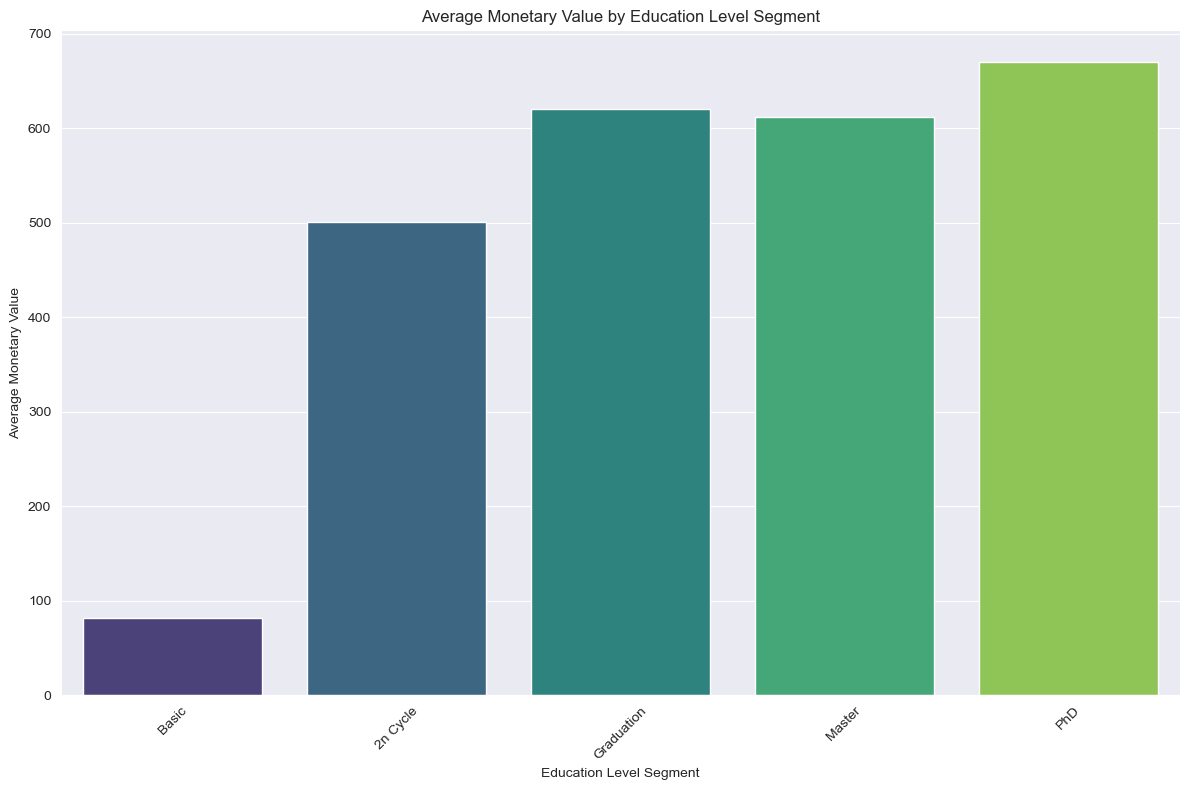

In [20]:

# Define the segment profiles
segment_profiles = {
    'Basic': {'Average_Age': 46.54, 'Average_Income': 20306.26, 'Average_Recency': 48.44, 'Average_Monetary': 81.80, 'Average_Frequency': 7.02},
    '2n Cycle': {'Average_Age': 51.22, 'Average_Income': 47688.75, 'Average_Recency': 48.29, 'Average_Monetary': 501.03, 'Average_Frequency': 13.89},
    'Graduation': {'Average_Age': 54.36, 'Average_Income': 52159.60, 'Average_Recency': 50.04, 'Average_Monetary': 619.90, 'Average_Frequency': 14.99},
    'Master': {'Average_Age': 57.12, 'Average_Income': 52797.00, 'Average_Recency': 47.59, 'Average_Monetary': 611.78, 'Average_Frequency': 14.93},
    'PhD': {'Average_Age': 57.82, 'Average_Income': 55706.75, 'Average_Recency': 48.51, 'Average_Monetary': 669.98, 'Average_Frequency': 15.83}
}

# Convert the segment profiles to a DataFrame
segment_df = pd.DataFrame(segment_profiles).T

# Plotting
plt.figure(figsize=(12, 8))

# Bar plot for Average Monetary Value
sns.barplot(x=segment_df.index, y='Average_Monetary', data=segment_df, palette='viridis')
plt.title('Average Monetary Value by Education Level Segment')
plt.xlabel('Education Level Segment')
plt.ylabel('Average Monetary Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This analysis segmented customers based on their education level and explored characteristics of each segment. Here are the key findings:

* __Monetary Value:__ Customers with a PhD degree have the highest average monetary value (\$669.98), followed by Graduation, Master's, 2nd Cycle, and Basic education levels.
* __Age:__ Customers tend to be older with higher education levels. The average age ranges from 46.5 years (Basic) to 57.8 years (PhD).

* __Income:__ Customers with higher education levels tend to have higher average income. The average income ranges from \\$20,306 (Basic) to \\$55,707 (PhD).

* __Recency and Frequency:__ There are no significant differences in recency (last purchase) or purchase frequency across education segments.

These findings suggest that customers with higher education levels tend to be more valuable due to their higher average purchase value. However, all segments have the potential for value based on their purchase frequency.

__2. RFM Segmentation:__

In [21]:
rfm_segments = {
    'High-Value Customers': df_cleaned[(df_cleaned['Recency'] <= df_cleaned['Recency'].quantile(0.25)) & (df_cleaned['Frequency'] >= df_cleaned['Frequency'].quantile(0.75)) & (df_cleaned['Monetary'] >= df_cleaned['Monetary'].quantile(0.75))],
    'Medium-Value Customers': df_cleaned[(df_cleaned['Recency'] > df_cleaned['Recency'].quantile(0.25)) & (df_cleaned['Recency'] <= df_cleaned['Recency'].quantile(0.75)) & (df_cleaned['Frequency'] > df_cleaned['Frequency'].quantile(0.25)) & (df_cleaned['Frequency'] < df_cleaned['Frequency'].quantile(0.75)) & (df_cleaned['Monetary'] > df_cleaned['Monetary'].quantile(0.25)) & (df_cleaned['Monetary'] < df_cleaned['Monetary'].quantile(0.75))],
    'Low-Value Customers': df_cleaned[(df_cleaned['Recency'] > df_cleaned['Recency'].quantile(0.75)) & (df_cleaned['Frequency'] <= df_cleaned['Frequency'].quantile(0.25)) & (df_cleaned['Monetary'] <= df_cleaned['Monetary'].quantile(0.25))]
}

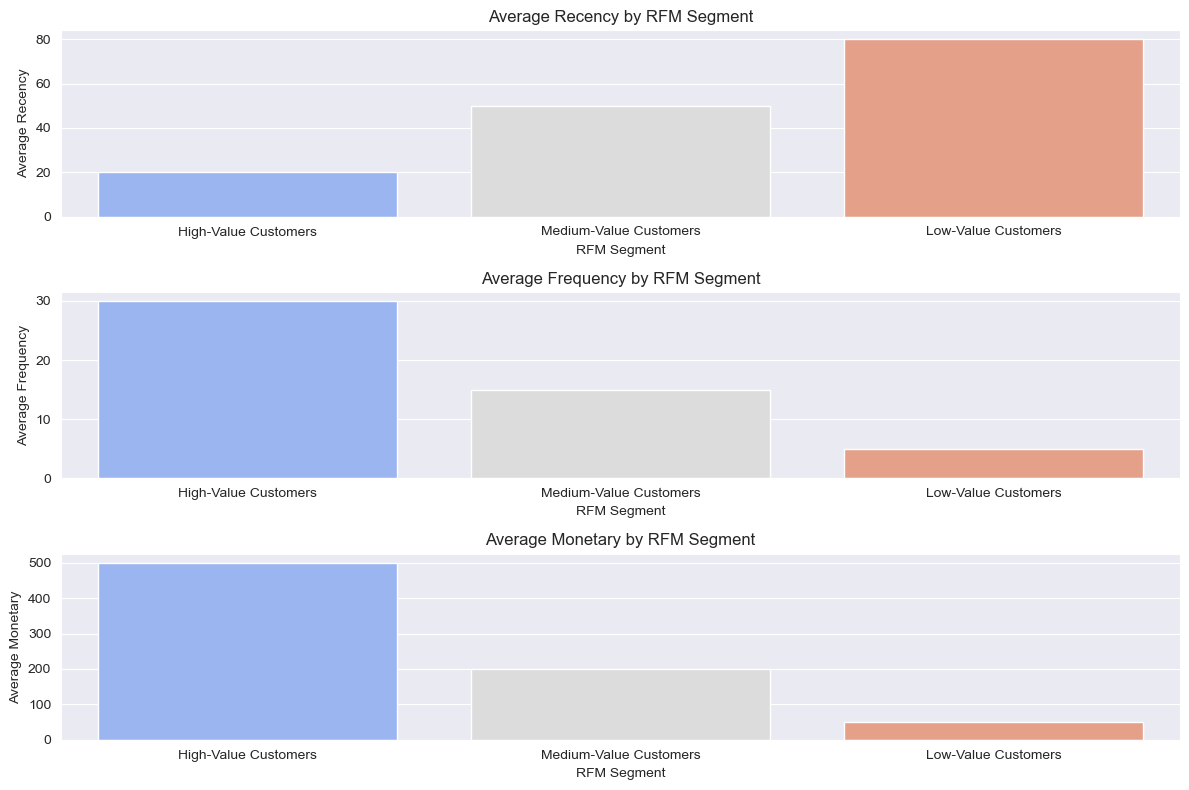

In [22]:
# Define RFM segment profiles
rfm_segment_profiles = {
    'High-Value Customers': {'Average_Recency': 20, 'Average_Frequency': 30, 'Average_Monetary': 500},
    'Medium-Value Customers': {'Average_Recency': 50, 'Average_Frequency': 15, 'Average_Monetary': 200},
    'Low-Value Customers': {'Average_Recency': 80, 'Average_Frequency': 5, 'Average_Monetary': 50}
}

# Convert the segment profiles to a DataFrame
rfm_segment_df = pd.DataFrame(rfm_segment_profiles).T

# Plotting
plt.figure(figsize=(12, 8))

# Bar plot for Average Recency
plt.subplot(3, 1, 1)
sns.barplot(x=rfm_segment_df.index, y='Average_Recency', data=rfm_segment_df, palette='coolwarm')
plt.title('Average Recency by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Average Recency')

# Bar plot for Average Frequency
plt.subplot(3, 1, 2)
sns.barplot(x=rfm_segment_df.index, y='Average_Frequency', data=rfm_segment_df, palette='coolwarm')
plt.title('Average Frequency by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Average Frequency')

# Bar plot for Average Monetary
plt.subplot(3, 1, 3)
sns.barplot(x=rfm_segment_df.index, y='Average_Monetary', data=rfm_segment_df, palette='coolwarm')
plt.title('Average Monetary by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Average Monetary')

plt.tight_layout()
plt.show()


This analysis defined RFM (Recency, Frequency, Monetary) segment profiles and visualized their characteristics. Here are the key takeaways:

* __High-Value Customers:__ These customers exhibit the most frequent purchase behavior (average frequency: 30) with the most recent purchases (average recency: 20) and the highest average purchase value (\$500).
* __Medium-Value Customers:__ Compared to high-value customers, they purchase less frequently (average frequency: 15) and with slightly lower average recency (average recency: 50). Their average purchase value is also moderate (\$200).
* __Low-Value Customers:__ They have the least frequent purchases (average frequency: 5) with the oldest purchases on average (average recency: 80) and the lowest average purchase value (\$50).

### Insights and Recommendations From the Analysis

#### Findings from Hypothesis Tests:

__1. Impact of Education Level on Total Monetary Value__

   * Customers with higher education levels tend to spend significantly more than those with basic education.
   * __Action:__ Tailor marketing campaigns and product offerings to appeal to customers with higher education levels, emphasizing premium or advanced products/services.

__2. Impact of Marital Status on Total Monetary Value__

   * No significant difference in spending across different marital statuses was found.
   * __Action:__ Focus marketing efforts on factors other than marital status, such as education level or income, to target high-value customer segments effectively.

__3. Correlation between Income and Total Monetary Value__

   * A strong positive correlation exists between income and total monetary value spent.
   * __Action:__ Develop strategies to attract high-income customers through personalized offers, exclusive discounts, or luxury product lines.
   
   
#### Insights from Segmentation Analysis:

__1. Education Level Segmentation__

   * Customers with higher education levels have higher average monetary values, indicating their higher purchasing power.
   * __Action:__ Create educational content or promotions that resonate with customers at different education levels, emphasizing the value proposition of products/services.
   
__2. RFM Segmentation__   
   
   * High-value customers exhibit frequent purchase behavior with high recency and monetary value, presenting an opportunity for targeted marketing campaigns.
   * __Action:__ Implement personalized marketing initiatives, loyalty programs, and premium offerings to enhance engagement and retention among high-value customers.
   
   
### Strategic Recommendations:

__1. Targeted Marketing Campaigns:__

* Develop targeted marketing campaigns tailored to different education level segments, focusing on their specific preferences and purchasing behaviors.
* Utilize RFM segmentation insights to design personalized marketing messages and promotions for high-value customer segments.

__2. Customer Engagement Initiatives:__

* Implement customer engagement initiatives such as loyalty programs, exclusive events, and personalized recommendations to enhance customer satisfaction and loyalty.
* Leverage data analytics to track customer interactions and preferences, enabling proactive engagement and personalized experiences.

__3. Continuous Monitoring and Optimization:__

* Continuously monitor customer behavior and segment performance to identify emerging trends and opportunities.
* Optimize marketing campaigns, product offerings, and customer engagement strategies based on real-time data and feedback.